# Question 1 - Unique Binary Search Trees
## Prompt:
### Given n, how many structurally unique BST's (binary search trees) that store values 1 ... n?
Leetcode link - https://leetcode.com/problems/unique-binary-search-trees/

## Approach:

Initial brute force approach would be to iterate across all possible trees, which would mean creating/navigating each possible tree path. This is very expensive in terms of run time. You can try a left side of 0 items and stick all the rest to the right side. You can try a left side with just 1 item and stick the rest to the right. Thus we can think of all the combinations as:
* 0 to the left, n - 1 to the right
* 1 to the left, n - 2 to the right
* ...
* n - 1 to the left, 0 to the right

We have to do this for each depth of the tree, and the depth of the tree can be up to n deep, meaning the worst case runtime would be O(n^n).

One key thing to note here is that for a BST, all things assigned to the left must be lower and all things assigned to the right must be higher. Because of this, we can just think of all the numbers as a bunch of blocks numbered 1 to n and we simply have to pick a block to be the divider (parent node) and all the blocks on the left go to the left side of the BST and all the blocks on the right go to the right side of the BST.

So how do we reduce something that is exponential in nature? We can take this as a hint to use [Dynamic Programming](https://www.geeksforgeeks.org/dynamic-programming/) to make things linear in nature.

The recursive sub problem that we can memoize is running `numTrees` on a smaller `n` value. The base case would be when `n` is either 1 or 0, in which case, there is only 1 possible resulting tree structure.

In [3]:
class Solution:
    def __init__(self):
        self.mapping = dict()
        
    def numTrees(self, n: int) -> int:
        if n < 2:
            return 1
        
        if n in self.mapping:
            return self.mapping[n]
        
        count = 0
        for i in range(n):
            count += self.numTrees(i) * self.numTrees(n - 1 - i)
            
        self.mapping[n] = count
        return count
    
s = Solution()
s.numTrees(5)

42

## Analysis:
Our new solution only calculates `numTrees` n times because whenever we encounter some `n` value again, we have a memoized value to draw from. Thus the new runtime is O(n) with space O(n) as well.

### 07/25/2020 execution results
Runtime: 28 ms, faster than 75.31% of Python3 online submissions for Unique Binary Search Trees.
Memory Usage: 14 MB, less than 17.61% of Python3 online submissions for Unique Binary Search Trees.

As we can see here, the runtime is pretty solid at the 75th percentile while the memory performance is a bit poor, coming in at the bottom quartile. We could improve the memory complexity if we didn't track the number of unique BSTs at each value of `n`.

# Question 2 - a pseudo graph problem
## Prompt: Given a graph as an adjacency list, output the max possible "network rank" in this graph.


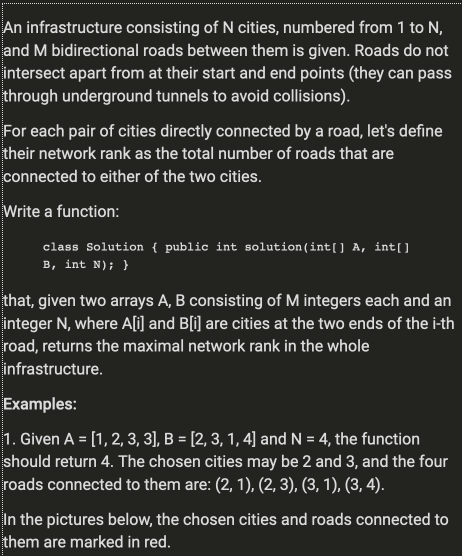

## Approach:
We can break this problem down into two steps.
1. Iterate over the edges and compute scores for each node/city
2. Iterate over the edges and compute scores for each edge/road

In [4]:
# technically we don't really need an N if we assume the input is correctly formatted
def solution(A, B, N):
    cityScores = dict()
    for i in range(len(A)):
        cityScores.setdefault(A[i], 0)
        cityScores[A[i]] += 1
        cityScores.setdefault(B[i], 0)
        cityScores[B[i]] += 1
        
    maxRoadScore = 0
    for i in range(len(A)):
        # don't want to double count the road that connects the two cities
        roadScore = cityScores[A[i]] + cityScores[B[i]] - 1
        maxRoadScore = max(maxRoadScore, roadScore)
        
    return maxRoadScore
        
solution([1, 2, 3, 4], [2, 3, 4, 5], 5)

3

# Question 3 - a stack related problem
## Prompt:
You are given an array of N distinct integers. We would like to sort this array into ascending order using a simple algorithm:

First we divide array into one or more contiguous subarrays. Then we sort each subarray. After that, we join the sorted subarrays in the same order it was divided.

What's the max number of subarrays you can make such that this algorithm works?

Another way to think about it is what's the max number of groups I can split this array into such that when each group is sorted, the whole array is sorted?

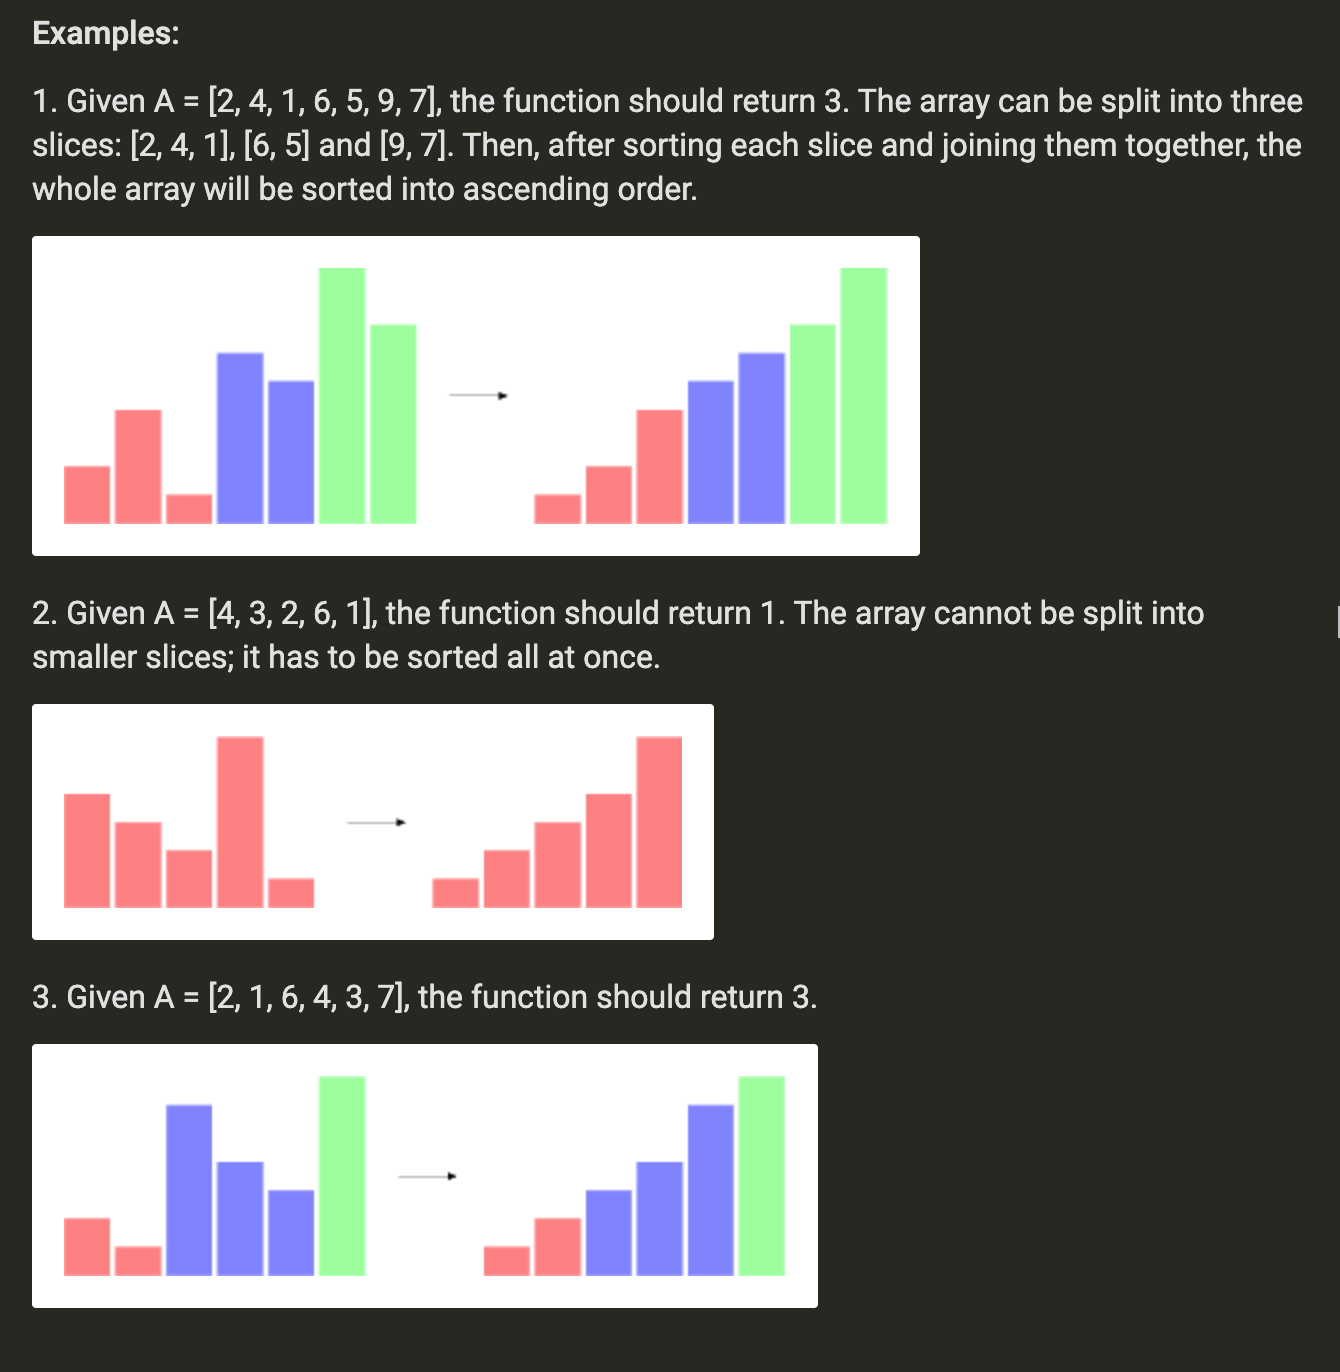

In [5]:
def solution(A):
    # each item in the stack represents the max value of one slice that needs to be sorted
    # size of stack = max total number of slices that need to be sorted
    stack = []
    for num in A:
        # print('stack so far: ', stack)
        # print('processing: ', num)
        if stack and num < stack[-1]:
            largest = stack.pop()
            # remove until our curr num is second biggest after "largest"
            while stack and num < stack[-1]:
                stack.pop()
            # put largest back into stack
            stack.append(largest)
        else:
            stack.append(num)
        
        
    return len(stack)

print(solution([4, 3, 2, 6, 1])) # 1
solution([3, 2, 6, 5, 9, 7]) # 3

1


3

### misc.
Recently, another resource I have found to supplement Leetcode in case you are getting bored of Leetcode is [Codility](https://app.codility.com). They have coding lessons and challenges for programmers of all levels to participate in.

*Happy coding and godspeed on getting a job!* <3